<center><font size = 6> Classificação de Variáveis

Notebook de execução didática da classificação de variáveis, baseado nas dissertações de Martins, A. (2006), Marques, J. (2006) e Prata, D. (2009).<p>
@giovani.gerevini <p>
@C3OM <p>
versão: 13/06/2023 <p>

In [1]:
import sys
import os

# Adiciona a pasta do bibgolfadas ao path
sys.path.append(os.path.abspath(os.path.join('..', 'bibgolfadas')))

# Importe a classe ClassificacaodeVariaveis
import ClassificacaodeVariaveis

# Crie uma instância da classe ClassificacaodeVariaveis
CLAV = ClassificacaodeVariaveis.CLAV()

In [2]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# # sns.set(rc={'figure.figsize':(18,10)})
# sns.set(font_scale=2)
import warnings
warnings.filterwarnings('ignore')

# Introdução

A associação do elevado volume de dados em plantas industriais aos distúrbios de processo e ruídos inerentes à instrumentação industrial agrega complexidade ao sistemas de medição e monitoramento dos dados.

Neste sentido, para valiadar balanços materiais, indices de monitoramento e até mesmo malhas de controle faz-se necessária a decomposição e reconciliação dos dados de processo. Neste sentido, tem-se a classificação de variáveis como uma ferramenta essencial para tanto. Em poucas palavras, a CV é utilizada para verificar as dimensão do problema, prever e remediar possíveis lacunas de medição e definir as melhores estratégias para solução do problema de reconciliação.

Assim, neste notebook será introduzida a técnica de CV utilizada no LMSCP - Laboratório de Modelagem , Simulação e Controle de Processo, da COPPE/UFRJ.

# Classificação de Variáveis

Algoritmos de Cassificação de Variáveis, através do entendimento da topologia do porcesso, têm por objetivo indicar o grau de obseravbilidade e redundância dos procesos, a fim de analisar a possibilidade da aplicação da reconciliação de dados em processos em operações assim como viabilizar a reconciliação em projetos de instrumentção industrial.

De forma sequencial, o modelo do processo é definido, identificando as variáveis existentes e medidas a fim de construir a matriz de ocorrência que auxilia a definicão do grau de determinação do processo.

A seguir, o passo a passo será destrinchado.

## Formulação do Modelo

Formular o modelo matemático adequado e escrever todas as equações do mesmo, em um arquivo txt, conforme abaixo:

    a = b * x + c
   
Obs.: Importante separar com espaço vazio os operadores matemáticos das variáveis. Casomantenha junto (a=b*x+c) o código não reconhece a variável.

Neste documento, de forma didática, é utilizado o modelo abordade na dissertação de Martins.

In [3]:
# modelo apresentado na seção 3.2) da dissertação de Antonio Martins
nomeModelo = 'Flash_simples.txt'

## Identificação das Variáveis

Identificar cuidadosamente todas as variáveis do processo. Essas variáveis devem ser subdivididas em : variáveis medidas e variáveis não medidas. 

In [4]:
constantesModelo = ['P1_sat', 'P2_sat']
parametrosAjuste = ['n']
variaveisMedidas = ['F1','F3','P']

In [5]:
# Equacoes, variaveis, variaveisNaoMedidas = CLAV.Formulacao_Modelo(nomeModelo, variaveisMedidas, 
                                                            #  constantesModelo,1)

CLAV.Formulacao_Modelo(nomeModelo, variaveisMedidas, constantesModelo,1)

Modelo Flash_simples.txt carregado com sucesso
Número de equações: 6
Número de variáveis: 11
Número de variáveis medidas: 3
Número de variáveis não medidas: 8
Variáveis:
['F1', 'F2', 'F3', 'P', 'n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l']
Variáveis medidas:
['F1', 'F3', 'P']
Variáveis não medidas:
['F2', 'n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l']
                             Equações
1                        F1 = F2 + F3
2     F1 * y1l = F2 * y12 + F3 * y13 
3      F1 * y2l = F2 * y22 + F3 * y23
4  y1l + y2l = y12 + y22 = y13 + y23 
5          y13 = n * y12 * P1_sat / P
6          y23 = n * y22 * P2_sat / P


(                             Equações
 1                        F1 = F2 + F3
 2     F1 * y1l = F2 * y12 + F3 * y13 
 3      F1 * y2l = F2 * y22 + F3 * y23
 4  y1l + y2l = y12 + y22 = y13 + y23 
 5          y13 = n * y12 * P1_sat / P
 6          y23 = n * y22 * P2_sat / P,
 ['F1', 'F2', 'F3', 'P', 'n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l'],
 ['F2', 'n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l'])

## Construção da Matriz de Ocorrência

Construção de uma matriz de ocorrência para o modelo desenvolvido, preenchendo as posições i,j, com 1 se a variável j aparece na equação i, ou zero em qualquer outro caso.

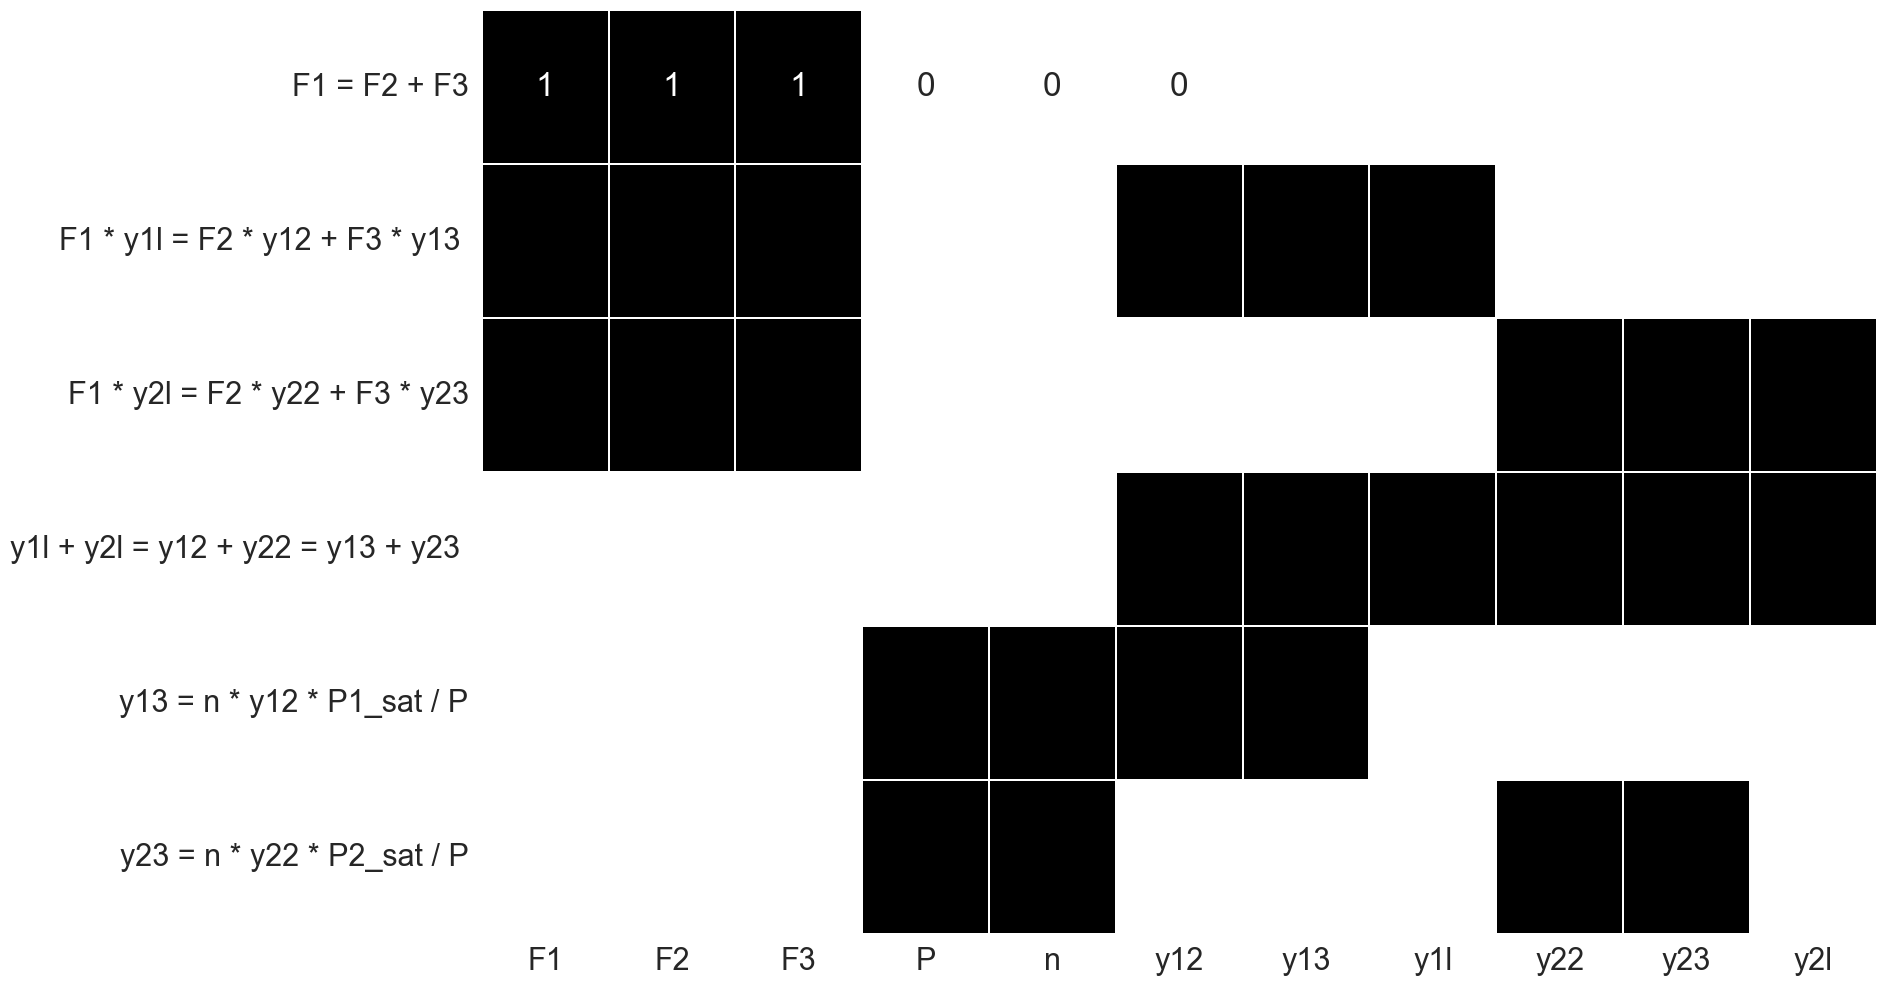

In [6]:
# matrizOcorrencia = CLAV.Matriz_de_Ocorrencia(Equacoes, variaveis, 1)
matrizOcorrencia = CLAV.Matriz_de_Ocorrencia(1)

## Validação da Matriz de Ocorrência

Após construção da matriz de ocorrência, devem-se ratificar cuidadosamente todas as
equações e variáveis envolvidas na formulação do modelo, para evitar uma classificação errônea do processo estudado.

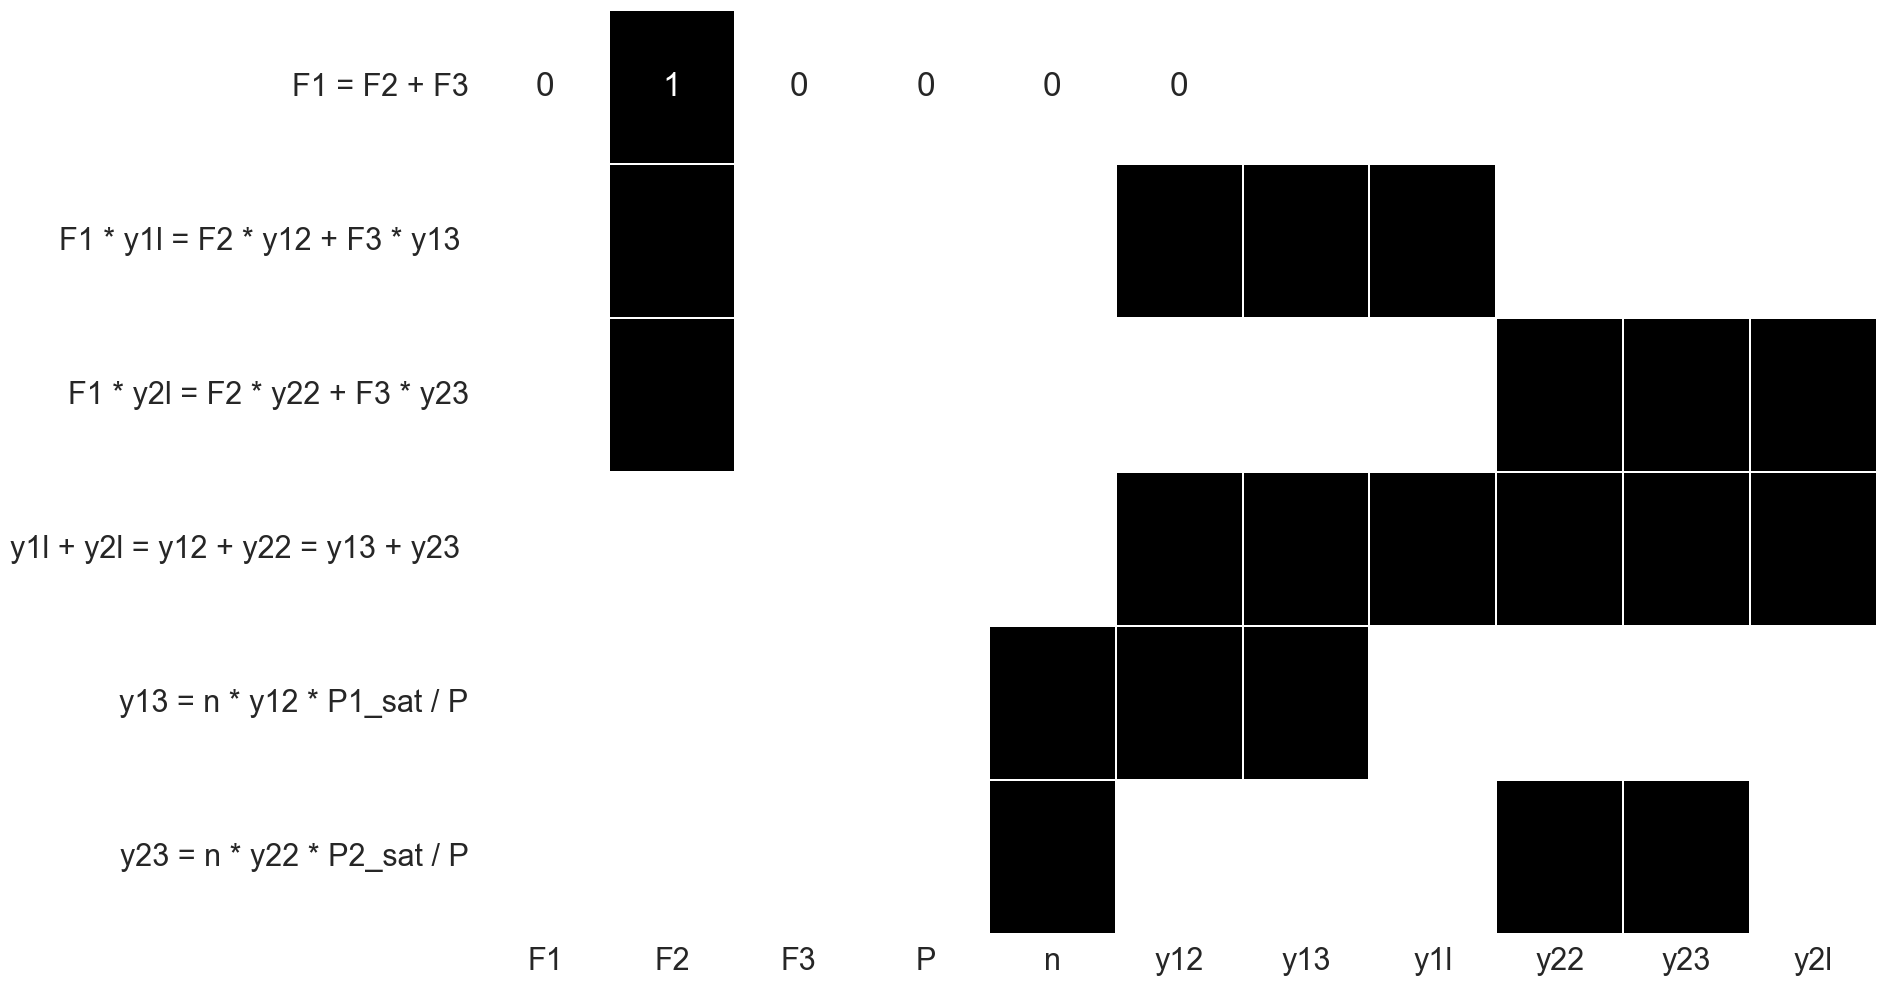

In [7]:
matrizOcorrencia_validada = CLAV.Identifica_Variaveis_Medidas(matrizOcorrencia, 1)

## Determinação de Ordem Preliminar de Procedência

Com a matriz de ocorrência original já validada e as variáveis medidas e não medidas especificadas, busca-se uma linha na matriz de ocorrência que tenha apenas uma entrada (o número 1). Essa entrada representa um subconjunto removível. Remove-se o subconjunto eliminando a linha e a coluna onde ele ocorre. Indica-se para o usuário que essa coluna (variável) é para ser resolvida com a respectiva linha (equação). A variável eliminada é portanto observável através da equação eliminada.
Repete-se esta etapa até que não haja mais linhas com apenas uma ocorrência. 
Caso todas as variáveis possam ser calculadas com as equações disponíveis, o sistema fica totalmente determinável com a ordem pré-estabelecida. Caso contrário, faz-se necessária a continuação da determinação da ordem de precedência do modelo construído. As equações não eliminadas constituem a redundância do modelo estudado.

A variável F2 é determinada pela equação 1
Continuar a determinação da ordem de precedência do modelo construído


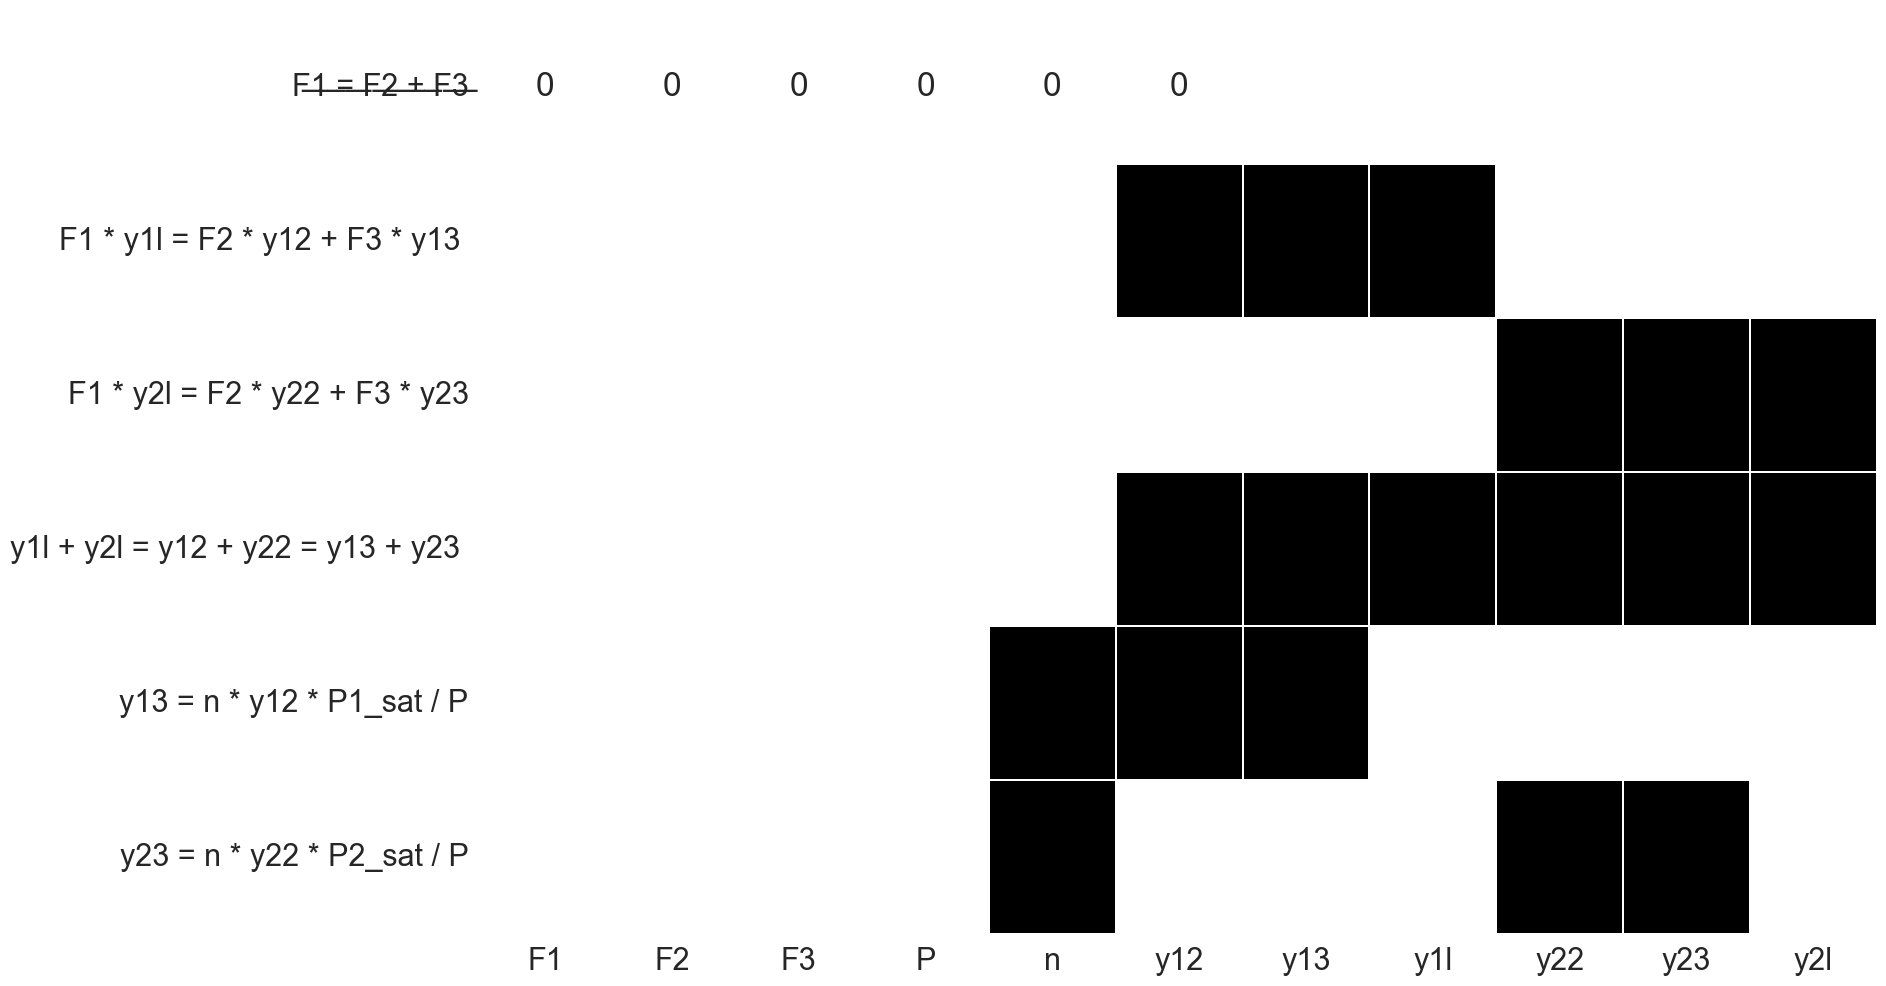

In [8]:
# variaveisNMedidasObservaveis = pd.DataFrame(data=[],columns=['var','eq'])

# novaMatrizOcorrencia, vNMO = Determina_Ordem_Preliminar(matrizOcorrencia, 
#                                                         variaveisNMedidasObservaveis,
#                                                         1, 1)

matrizOcorrencia_preliminar = CLAV.Determina_Ordem_Preliminar(matrizOcorrencia_validada, 1, 1)

## Classificando as Variáveis

Nesta etapa é feita a classificação das variáveis entre variáveis medidas não redundantes e redundantes e variáveis não medidas observáveis e indetermináveis.

Primeiramente, procura-se especificar as variáveis não medidas. As variáveis não
medidas que podem ser calculadas através das equações do modelo, são classificadas em variáveis não medidas observáveis. Aquelas que não podem ser determinadas através das equações restantes são consideradas indetermináveis, sendo necessário medir aquela variável para tornar o sistema totalmente determinável.

Depois de especificadas todas as variáveis não medidas, procura-se classificar
completamente as variáveis. As variáveis redundantes são aquelas que podem ser calculadas através de outras equações mesmo quando não são informadas. No código desenvolvido, mesmo a variável sendo conhecida, admite-se que a mesma passa a ser não mensurável, modificando o conjunto completo das variáveis. Se a variável que passou a ser não medida, continuar sendo estimável (calculada) através das equações existentes, então o código classifica essa variável como redundante. Se essa variável não puder ser calculada, a mesma será considerada como variável não redundante. Essa variável torna-se, então, imprescindível para a completa determinação do modelo proposto.

In [9]:
CLAV.Classificacao_Variaveis(1)

Nº de Variáveis Indetermináveis: 7
Variáveis Indetermináveis: ['n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l']
Variáveis não medidas observáveis:
['F2']


##  Determinação do Grau de Sobredeterminação

Caso existam equações que não foram usadas para estimar variáveis ou não servem
para estimar variáveis, procura-se determinar o grau de sobredeterminação do sistema. O grau de sobredeterminação é dado pela soma do número de equações que não foram utilizadas.


In [10]:
# gS, eNU = Grau_Sobredeterminacao(vNMO, Equacoes, 1)
CLAV.Grau_Sobredeterminacao(1)

Grau de Sobredeterminação: 5
Equações não utilizadas: [2, 3, 4, 5, 6]


## Escolha da Variável de Corte (iteração) 

Após a determinação da ordem de precedência preliminar, é verificado se o sistema
está totalmente determinável. Caso contrário, o código proposto define uma variável de corte. A variável de corte é a coluna com maior número de ocorrências; ou seja, a variável que aparece em um maior número de equações. Esta escolha deve-se ao maior número de combinações possíveis para a obtenção de um sistema totalmente determinável. No código desenvolvido, todas as ocorrências encontradas são substituídas pelo número 2 (dois). Esse número serve como flag para indicar que não se dispõe daquela variável.
Depois da definição da variável de corte, o código repete a quinta etapa até que não haja mais linhas com apenas uma ocorrência de valor 1.

Lista de Variáveis: 
['y12' 'y13' 'y22' 'y23']
Variavel escolhida: y12


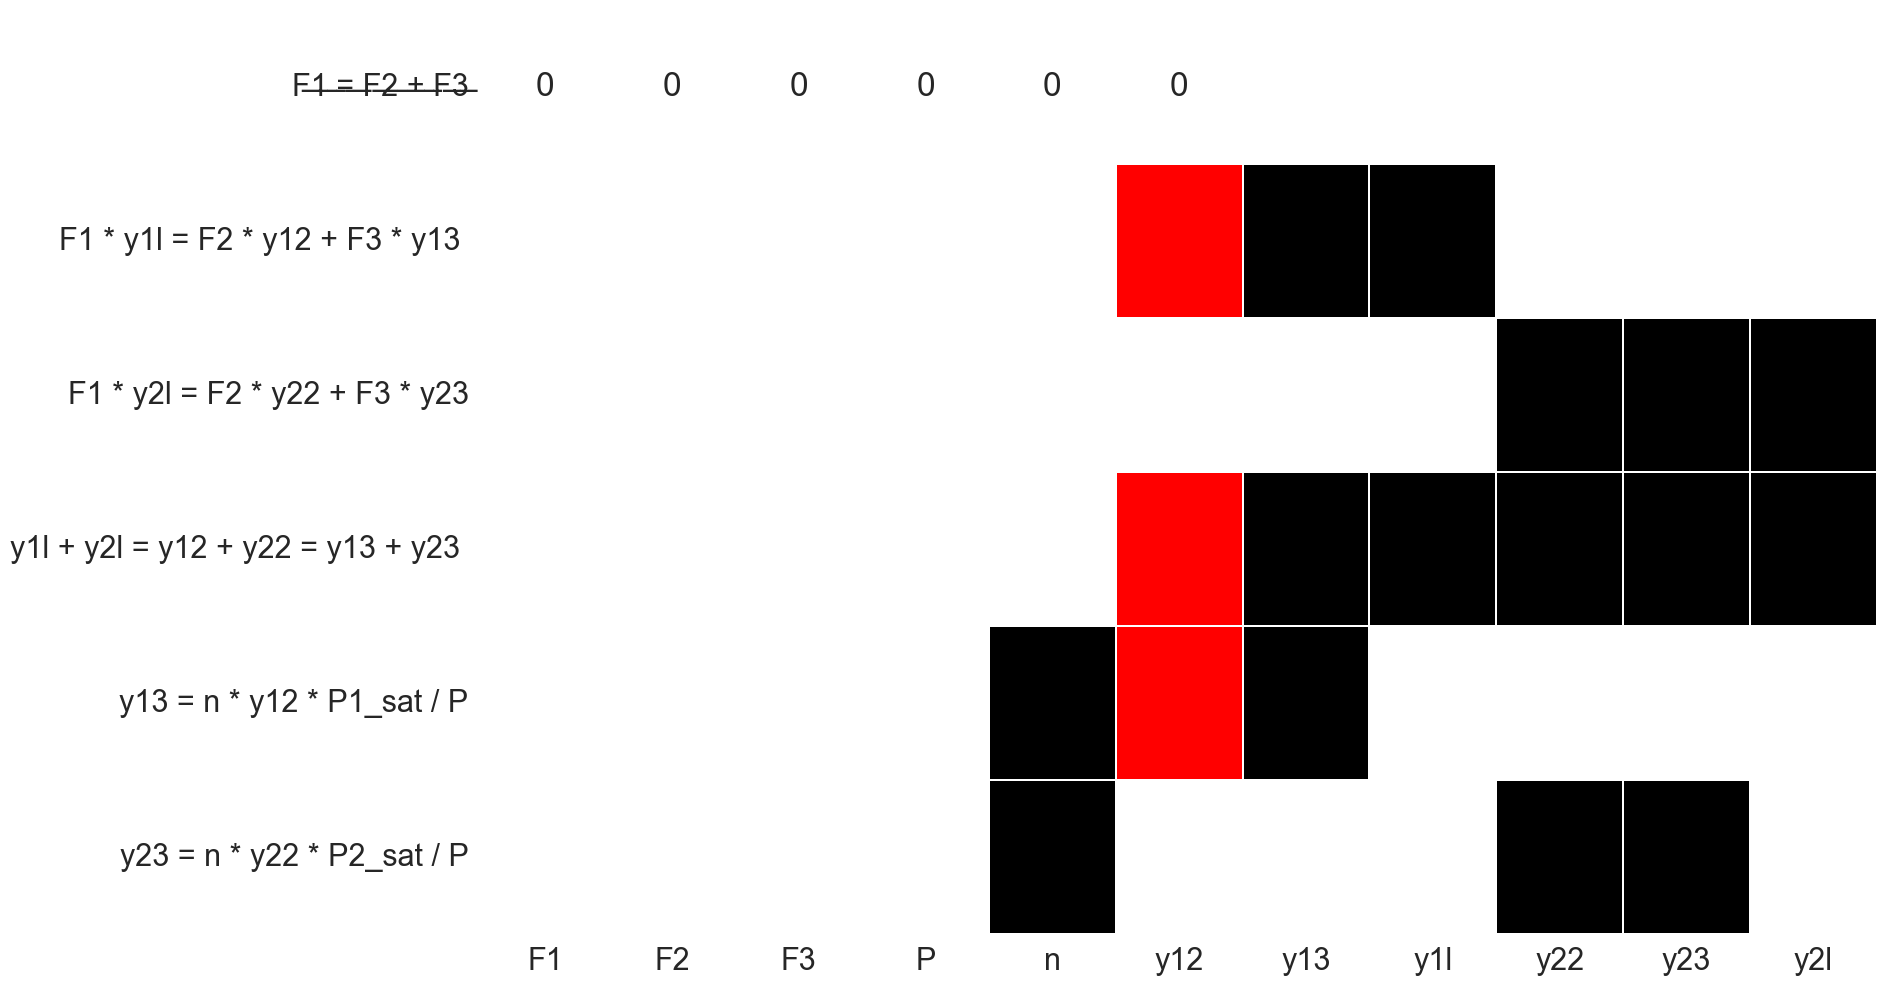

A variável de corte determinada é y12


In [13]:
novaMatrizOcorrencia = CLAV.Escolha_Variavel_Corte(matrizOcorrencia_preliminar,1,1)

In [ ]:
CLAV.Elimina_Variavel_Corte(novaMatrizOcorrencia,1)

In [25]:
# Eliminando variável de iteração
c = 1
matrizOcorrencia_aux = pd.DataFrame(novaMatrizOcorrencia2)

while(c > 0):
    
    matrizOcorrencia_aux, vNMO   = Determina_Ordem_Preliminar(matrizOcorrencia_aux, vNMO, None, 1)

    c = np.sum(np.sum(matrizOcorrencia_aux.replace(2,0)))

    if c > 0:
        matrizOcorrencia_aux, vC = Escolha_Variavel_Corte(matrizOcorrencia_aux, vC, None, 1)

novaMatrizOcorrencia3 = pd.DataFrame(matrizOcorrencia_aux)

print('===================================')
print('Determinação de Ordem Preliminar terminada') 
print('===================================')

Continuar a determinação da ordem de precedência do modelo construído
Lista de Variáveis: 
['y12' 'y13' 'y23']
Escolha novamente
Variavel escolhida: y23
A variavel de corte determinada é y23
A variavel y2l é determinada pela equação 3
A variavel n é determinada pela equação 6
Continuar a determinação da ordem de precedência do modelo construído
Lista de Variáveis: 
['y12' 'y13']
Variavel escolhida: y13
A variavel de corte determinada é y13
A variavel y12 é determinada pela equação 5
A variavel y1l é determinada pela equação 2
Sistema Totalmente Determinável com a ordem pré-estabelecida
Determinação de Ordem Preliminar terminada


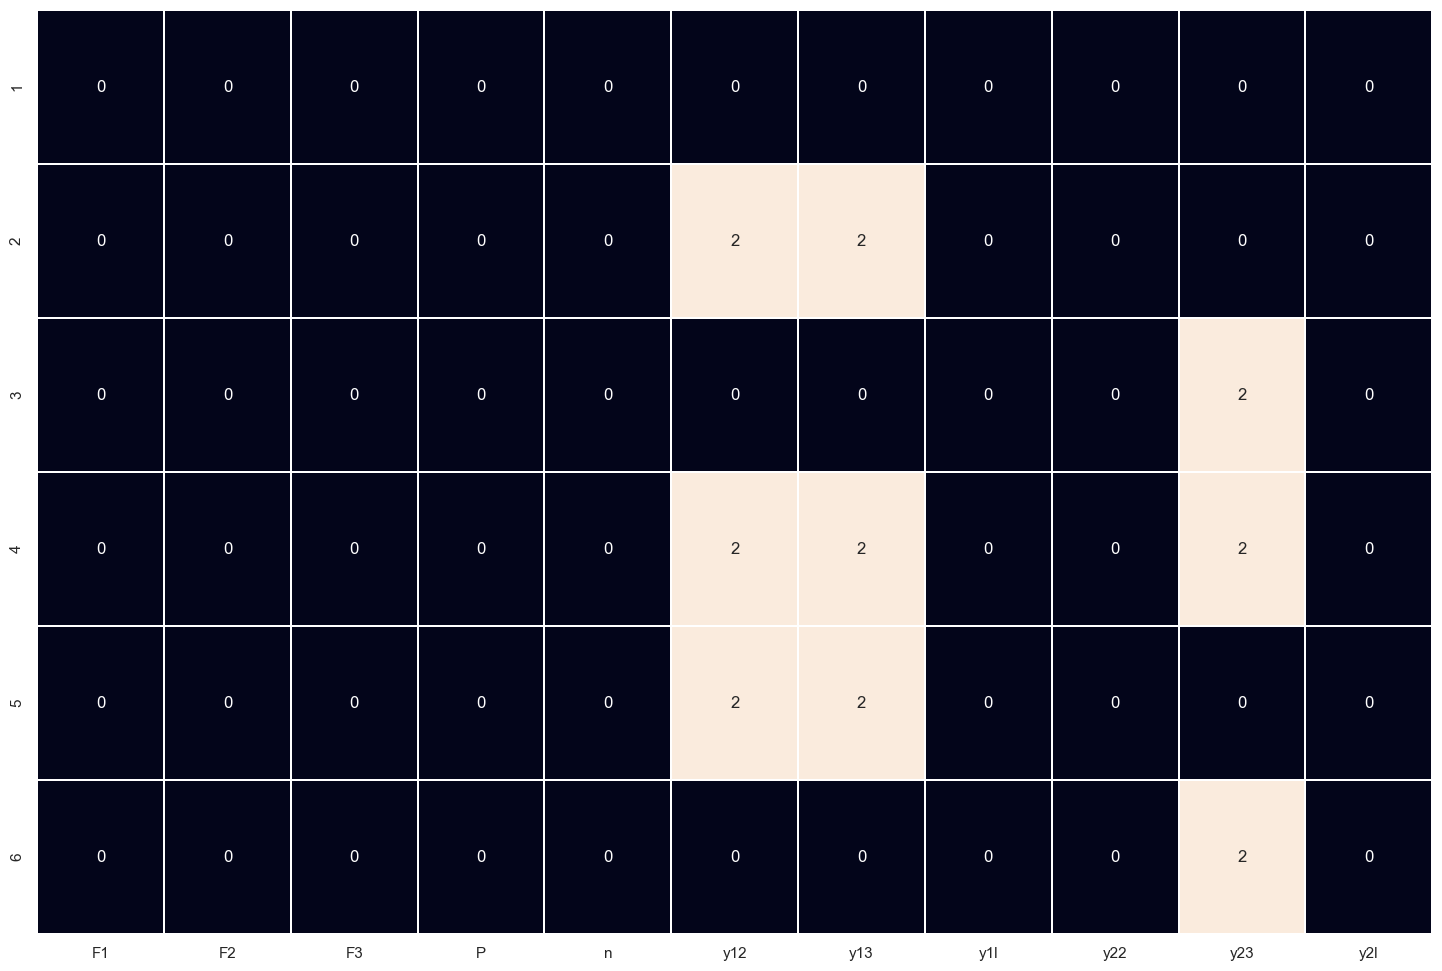

In [18]:
visualiza_matriz(novaMatrizOcorrencia3,1)

## Eliminação da Variável de Iteração

A variável de iteração foi criada para propiciar uma tomada de decisão no código implementado. Apesar de a variável ser não medida, ela é considerada medida e é atribuído valor dois na matriz. Após a completa varredura em toda a matriz de ocorrência, retorna-se para verificar se aquela variável de corte considerada pode ser calculada através de alguma equação que ainda não foi utilizada. Caso isso seja possível, a variável torna-se não medida observável. Caso contrário, ela será considerada uma variável indeterminada no algoritmo desenvolvido. Tal informação será bastante útil para os engenheiros de processo, pois a medição dessa variável de iteração pode tornar o sistema totalmente determinável.

In [22]:
def Elimina_VariaveldeCorte(matrizOcorrencia, variaveisNMedidasObservaveis, 
                            visualiza = None, log = None):
    #Eliminação das linhas
    novaMatrizOcorrencia         = pd.DataFrame(matrizOcorrencia)
    
    matrizOcorrencia_aux         = pd.DataFrame(matrizOcorrencia.replace(2,1))
    
    for i in variaveisNMedidasObservaveis['eq'].values:
        
        matrizOcorrencia_aux.drop(i, inplace=True)        
    
    c = 1
    
    while c>0:
        
        linhasUnitarias = matrizOcorrencia_aux.loc[matrizOcorrencia_aux.sum(axis=1) == 1]
        
        if len(linhasUnitarias) == 0:
            
            c=0
            
        else:
            equacao              = linhasUnitarias.index[0]
            
            variavelDeterminavel = linhasUnitarias.iloc[0][linhasUnitarias.iloc[0]==1].index.values[0]
            
            variaveisNMedidasObservaveis = variaveisNMedidasObservaveis.append(pd.DataFrame(data=[[variavelDeterminavel, 
                                                                    equacao]],columns=['var','eq']),ignore_index=True)

            novaMatrizOcorrencia[variavelDeterminavel] = np.zeros(len(novaMatrizOcorrencia[variavelDeterminavel]))
            
            matrizOcorrencia_aux[variavelDeterminavel] = np.zeros(len(matrizOcorrencia_aux[variavelDeterminavel]))
            
            if log != None:
                print('A variavel ' + str(variavelDeterminavel) + ' é determinada pela equação ' + str(equacao))
            else:
                None
        
    visualiza_matriz(matrizOcorrencia, visualiza)
    
    visualiza_matriz(novaMatrizOcorrencia, visualiza)
    
    if log != None:
        
        if matrizOcorrencia_aux.sum().sum() == 0:
            print('Sistema Totalmente Determinável com a ordem pré-estabelecida')
        else:
            None

        print('===================================')
        print('Eliminada Variáveis de Corte') 
        print('===================================')    
    
    return novaMatrizOcorrencia, variaveisNMedidasObservaveis

Eliminada Variáveis de Corte


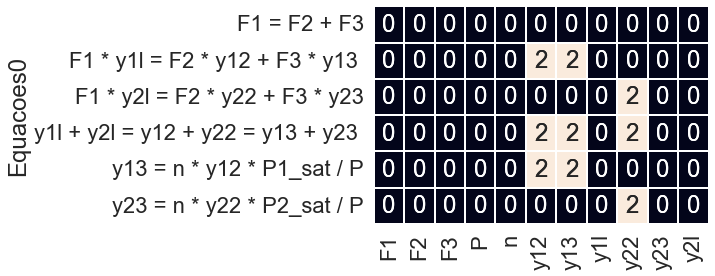

In [23]:
novaMatrizOcorrencia4, vNMO = Elimina_VariaveldeCorte(novaMatrizOcorrencia3, vNMO, 1, 1)

In [24]:
vI      = Classificacao_Variaveis(variaveis, variaveisMedidas, vNMO, 1)

gS, eNU = Grau_Sobredeterminacao(vNMO, Equacoes, 1)

Nº de Variaveis Indeterminaveis: 3
Variaveis Indetermináveis: ['y12', 'y13', 'y22']
Variáveis não medidas observáveis:
['F2', 'y1l', 'n', 'y23', 'y2l']
Grau de Sobredeterminação: 1
Equações não utilizadas: [4]


## Classificação Final do Modelo

Uma vez que o sistema está totalmente determinável, o código retorna com a
classificação completa do sistema, e inclui o grau de sobredeterminação e a matriz de ocorrência final após todas as etapas concluídas.
O código foi desenvolvido a partr da dissertação de Martins em linguagem Python.

Para a sua solução, utilizou-se a seguinte estrutura de fluxo de programação apresentada na Figura 3.2.
Os dados de entrada para o código são:
- o Modelo no formato txt;
- as constantes do Modelo; e
- as Variáveis medidas no processo;

In [25]:
print('Entradas: ')
print('===================================')
print('Modelo: ' + nomeModelo)
print(Equacoes)
try:
    print('Modelo: ' + constantesModelo)
except:
    None
print('Variaveis Medidas: ')
print(variaveisMedidas)
print('===================================')

Entradas: 
Modelo: Flash_simples.txt
                            Equacoes0
1                        F1 = F2 + F3
2     F1 * y1l = F2 * y12 + F3 * y13 
3      F1 * y2l = F2 * y22 + F3 * y23
4  y1l + y2l = y12 + y22 = y13 + y23 
5          y13 = n * y12 * P1_sat / P
6          y23 = n * y22 * P2_sat / P
Variaveis Medidas: 
['F1', 'F3', 'P']


Os resultados são:
- o número de variáveis medidas e não medidas;
- as variáveis observáveis e as indetermináveis;
- as medidas redundantes;
- o grau de determinação/sobredeterminação do modelo; e
- a matriz de ocorrência final.

Resultados: 
Número de Variáveis: 11
Número de Variáveis Medidas: 3
Número de Variáveis Não Medidas: 8
Variaveis Não Medidas:
['F2', 'n', 'y12', 'y13', 'y1l', 'y22', 'y23', 'y2l']
Número de Variáveis Não Medidas Observáveis: 5
Variaveis Variáveis Não Medidas Observáveis:
   var eq
0   F2  1
1  y1l  2
2    n  5
3  y23  6
4  y2l  3
Número de Variáveis Indetermináveis: 3
Variaveis Indetermináveis:
['y12', 'y13', 'y22']
Grau de Sobredeterminação: 1
Equações não utilizadas: 
[4]


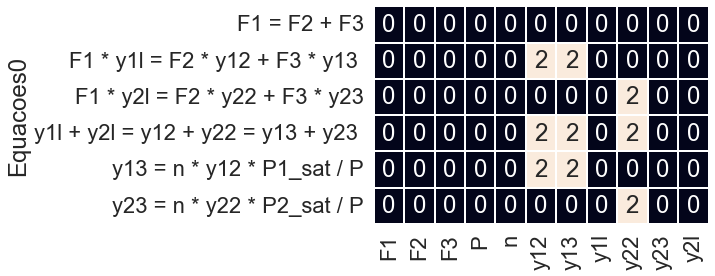

In [26]:
print('Resultados: ')
print('===================================')
print("Número de Variáveis: " + str(len(variaveis)))
print("Número de Variáveis Medidas: " + str(len(variaveisMedidas)))
print("Número de Variáveis Não Medidas: " + str(len(variaveisNaoMedidas)))
print("Variaveis Não Medidas:")
print(variaveisNaoMedidas)  
print('===================================')
print("Número de Variáveis Não Medidas Observáveis: " + str(len(vNMO)))
print("Variaveis Variáveis Não Medidas Observáveis:")
print(vNMO)  
print("Número de Variáveis Indetermináveis: " + str(len(vI)))
print("Variaveis Indetermináveis:")
print(vI)
print('===================================')
print('Grau de Sobredeterminação: ' + str(gS))
print('Equações não utilizadas: ')
print(eNU)
print('===================================')
visualiza_matriz(novaMatrizOcorrencia4, 1)


# Código de Classificação de Variáveis

In [27]:
def Funcao_Classificacao_de_Variaveis(modelo, variaveisMedidas, constantesModelo, 
                                      visualiza = None, log = None, relatorio = None):
    '''
    Função de Classificação de Variáveis e determinação do Grau de Determinação do modelo
    Entradas:
        modelo           = Arquivo txt do modelo a ser classificado, .txt
        variaveisMedidas = Vetor com as variáveis medidas, str
        constatesModelo  = Vetor com as constatnes do modelo, str
        visualiza        = Se desejar visualizar as matrizes de ocorrência, 1. (Default = None)
        log              = Se desejar visualizar os logs da classificação, 1. (Default = None)
        visualiza        = Se desejar visualizar relatório final da classificação, 1. (Default = None)        
    
    Saídas:
        equacoes         = Dataframe das equações do modelo
        variaveis        = vetor com todas as variáveis do modelo
        vNM              = vetor com as Variáveis Não Medidas do modelo
        matrizOcorrencia = matriz de ocorrencia inicial do modelo
        matrizdeOcorrenciaFinal = matriz de ocorrencia final, após classificação de variáveis
        vNMO             = DataFrame com as Variáveis Não Medidas Observáveis pelo modelo e 
                           as respectivas equações determinantes de cada variável
        vC               = vetor com as variáveis de corte
        vI               = vetor com as variáveis Indetermináveis pelo modelo
        gS               = grau de sobredeterminação do modelo
        eNU              = Equações não utiliza do modelo
    '''
    
    # 1 Formulação do Modelo e 2 Identificação das Variáveis
    equacoes, variaveis, vNM  = Formulacao_Modelo(modelo, variaveisMedidas,constantesModelo,
                                                  log)
    
    # 3 Construção da Matriz de Ocorrência    
    matrizOcorrencia_original = Matriz_de_Ocorrencia(equacoes, variaveis, 
                                                     visualiza)
    
    # 4 Validação da Matriz de Ocorrência
    matrizOcorrencia          = Identifica_Variaveis_Medidas(matrizOcorrencia_original, variaveisMedidas,
                                                             visualiza)
    
    print('==========================================')
    print('Iniciando Classificação de Variáveis.....') 
    print('==========================================')

    # 5 Determinação de Ordem Preliminar de Procedência
    vNMO                       = pd.DataFrame(data=[],columns=['var','eq'])
    novaMatrizOcorrencia, vNMO = Determina_Ordem_Preliminar(matrizOcorrencia,vNMO, 
                                                            visualiza, log)    
    
    # 6 Classificando as Variáveis
    vC = []
    vI = Classificacao_Variaveis(variaveis, variaveisMedidas, vNMO,
                                 log)
    
    # 7 Determinação do Grau de Sobredeterminação   
    gS, eNU = Grau_Sobredeterminacao(vNMO, equacoes,
                                     log)
    
    # 8 Escolha da Variável de Corte (iteração)
    novaMatrizOcorrencia2, vC   = Escolha_Variavel_Corte(novaMatrizOcorrencia, vC, 
                                                         visualiza, log)
    
    # Eliminando variável de iteração
    c = 1
    matrizOcorrencia_aux = pd.DataFrame(novaMatrizOcorrencia2)
    
    while(c > 0):
        
        matrizOcorrencia_aux, vNMO   = Determina_Ordem_Preliminar(matrizOcorrencia_aux, vNMO,
                                                                  visualiza, log)

        c = np.sum(np.sum(matrizOcorrencia_aux.replace(2,0)))

        if c > 0:
            
            matrizOcorrencia_aux, vC = Escolha_Variavel_Corte(matrizOcorrencia_aux, vC,
                                                              visualiza, log)
    novaMatrizOcorrencia3 = pd.DataFrame(matrizOcorrencia_aux)
    
    # 9 Eliminação da Variável de Corte 
    novaMatrizOcorrencia4, vNMO = Elimina_VariaveldeCorte(novaMatrizOcorrencia3, vNMO, 
                                                          visualiza, log) 
    
    matrizdeOcorrenciaFinal = pd.DataFrame(novaMatrizOcorrencia4)
    
    # reclassificação
    vI      = Classificacao_Variaveis(variaveis, variaveisMedidas, vNMO,
                                      log)
    
    gS, eNU = Grau_Sobredeterminacao(vNMO, equacoes,
                                     log)
    
    print('==========================================')
    print('Classificação Terminada.....') 
    print('==========================================')

    
    if relatorio != None:
        print(' ')
        print(' ')
        print(' ')
        print('======================================================================')
        print('              Classificação de Variáveis - Relatório ')
        print('======================================================================')
        print('Entradas: ')
        print('===================================')
        print('Modelo: ' + modelo)
        print(equacoes)
        try:
            print('Modelo: ' + constantesModelo)
        except:
            None
        print('Variaveis Medidas: ')
        print(variaveisMedidas)
        print(' ')
        print('===================================')
        print('Resultados: ')
        print('===================================')
        print("Número de Variáveis: " + str(len(variaveis)))
        print("Número de Variáveis Medidas: " + str(len(variaveisMedidas)))
        print("Número de Variáveis Não Medidas: " + str(len(vNM)))
        print("Variaveis Não Medidas:")
        print(vNM)  
        print('===================================')
        print("Número de Variáveis Não Medidas Observáveis: " + str(len(vNMO)))
        print("Variaveis Variáveis Não Medidas Observáveis:")
        print(vNMO)  
        print("Número de Variáveis Indetermináveis: " + str(len(vI)))
        print("Variaveis Indetermináveis:")
        print(vI)
        print('===================================')
        print('Grau de Sobredeterminação: ' + str(gS))
        print('Equações não utilizadas: ')
        print(eNU)
        print('===================================')
        try:
            visualiza_matriz(novaMatrizOcorrencia4, 1)
        except:
            None
        print(' ')
        print(' ')
        print(' ')
        
    return equacoes, variaveis, vNM, matrizOcorrencia, matrizdeOcorrenciaFinal, vNMO, vC, vI, gS, eNU   
    

# Avaliando cenários

## Analisador em F3

Iniciando Classificação de Variáveis.....
Classificação Terminada.....
 
 
 
              Classificação de Variáveis - Relatório 
Entradas: 
Modelo: Flash_simples.txt
                            Equacoes0
1                        F1 = F2 + F3
2     F1 * y1l = F2 * y12 + F3 * y13 
3      F1 * y2l = F2 * y22 + F3 * y23
4  y1l + y2l = y12 + y22 = y13 + y23 
5          y13 = n * y12 * P1_sat / P
6          y23 = n * y22 * P2_sat / P
Variaveis Medidas: 
['F1', 'F3', 'P', 'y12', 'y22']
 
Resultados: 
Número de Variáveis: 11
Número de Variáveis Medidas: 5
Número de Variáveis Não Medidas: 6
Variaveis Não Medidas:
['F2', 'n', 'y13', 'y1l', 'y23', 'y2l']
Número de Variáveis Não Medidas Observáveis: 6
Variaveis Variáveis Não Medidas Observáveis:
   var eq
0   F2  1
1  y1l  2
2    n  5
3  y23  6
4  y2l  3
5  y13  4
Número de Variáveis Indetermináveis: 0
Variaveis Indetermináveis:
[]
Grau de Sobredeterminação: 0
Equações não utilizadas: 
[]
 
 
 


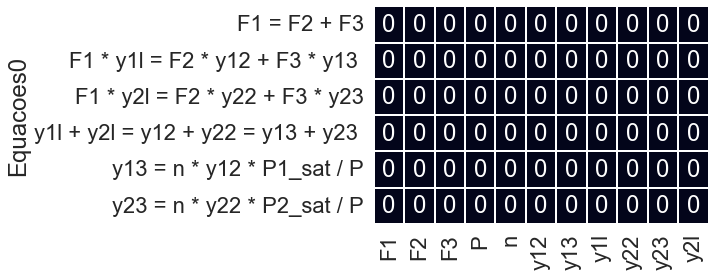

In [28]:
constantesModelo = ['P1_sat', 'P2_sat']
parametrosAjuste = ['n']
variaveisMedidas = ['F1','F3','P','y12','y22']

# ['F2', 'n', , 'y13', 'y1l',, 'y23', 'y2l']

eqs, vs, vNM, mO, mOF, vNMO, vC, vI, gS, eNU  = Funcao_Classificacao_de_Variaveis(nomeModelo, 
                                                                                  variaveisMedidas, 
                                                                                  constantesModelo,
                                                                                  None, None, 1)

# Modelo de 3 componentes

2000 – Bagajewicz,M. , Sánchez, M. - Reallocation and upgrade of instrumentation in process plants

In [29]:
constantesModelo = ['P1_sat', 'P2_sat', 'P3_sat']
parametrosAjuste = ['n']
variaveisMedidas = ['y12', 'y33','P']
# ['F2', 'n', , 'y13', 'y1l',, 'y23', 'y2l']

eqs, vs, vNM, mO, mOF, vNMO, vC, vI, gS, eNU  = Funcao_Classificacao_de_Variaveis('Flash_simples_3C.txt', 
                                                                                  variaveisMedidas, 
                                                                                  constantesModelo,
                                                                                  None, None, 1)

Iniciando Classificação de Variáveis.....
Classificação Terminada.....
 
 
 
              Classificação de Variáveis - Relatório 
Entradas: 
Modelo: Flash_simples_3C.txt
                                           Equacoes0
1                                       F1 = F2 + F3
2                    F1 * y1l = F2 * y12 + F3 * y13 
3                     F1 * y2l = F2 * y22 + F3 * y23
4                     F1 * y3l = F2 * y32 + F3 * y33
5  y1l + y2l + y3l = y12 + y22 + y32= y13 + y23 +...
6                         y13 = n * y12 * P1_sat / P
7                         y23 = n * y22 * P2_sat / P
8                         y33 = n * y32 * P3_sat / P
Variaveis Medidas: 
['y12', 'y33', 'P']
 
Resultados: 
Número de Variáveis: 14
Número de Variáveis Medidas: 3
Número de Variáveis Não Medidas: 11
Variaveis Não Medidas:
['F1', 'F2', 'F3', 'n', 'y13', 'y1l', 'y22', 'y23', 'y2l', 'y32', 'y3l']
Número de Variáveis Não Medidas Observáveis: 8
Variaveis Variáveis Não Medidas Observáveis:
   var eq
0   F3  

## Solução proposta no artigo

In [30]:
constantesModelo = ['P1_sat', 'P2_sat', 'P3_sat']
parametrosAjuste = ['n']
variaveisMedidas = ['y12', 'y33','P']
adicaoMedidas = ['F1', 'F2', 'y22']
# ['F2', 'n', , 'y13', 'y1l',, 'y23', 'y2l']

[variaveisMedidas.append(i) for i in adicaoMedidas]
eqs, vs, vNM, mO, mOF, vNMO, vC, vI, gS, eNU  = Funcao_Classificacao_de_Variaveis('Flash_simples_3C.txt', 
                                                                                  variaveisMedidas, 
                                                                                  constantesModelo,
                                                                                  None, None, 1)

Iniciando Classificação de Variáveis.....
Classificação Terminada.....
 
 
 
              Classificação de Variáveis - Relatório 
Entradas: 
Modelo: Flash_simples_3C.txt
                                           Equacoes0
1                                       F1 = F2 + F3
2                    F1 * y1l = F2 * y12 + F3 * y13 
3                     F1 * y2l = F2 * y22 + F3 * y23
4                     F1 * y3l = F2 * y32 + F3 * y33
5  y1l + y2l + y3l = y12 + y22 + y32= y13 + y23 +...
6                         y13 = n * y12 * P1_sat / P
7                         y23 = n * y22 * P2_sat / P
8                         y33 = n * y32 * P3_sat / P
Variaveis Medidas: 
['y12', 'y33', 'P', 'F1', 'F2', 'y22']
 
Resultados: 
Número de Variáveis: 14
Número de Variáveis Medidas: 6
Número de Variáveis Não Medidas: 8
Variaveis Não Medidas:
['F3', 'n', 'y13', 'y1l', 'y23', 'y2l', 'y32', 'y3l']
Número de Variáveis Não Medidas Observáveis: 8
Variaveis Variáveis Não Medidas Observáveis:
   var eq
0   F3  1